This assignment represents my own work. I did not work on this assignment with others. All coding was done by myself.

I understand that if I struggle with this assignment that I will reevaluate whether this is the correct class for me to take. I understand that the homework only gets harder.

# CS 671: Homework 2
### Alex Kumar

### Question 4

In [115]:
### Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay

In [116]:

### 4.1: Create training set X
NUM_SAMPLES = 50
I2 = np.array([[1, 0], [0, 1]])

X_neg = list(np.random.multivariate_normal([-5, -5], 5*I2, NUM_SAMPLES))
X_pos = list(np.random.multivariate_normal([5, 5], 5*I2, NUM_SAMPLES))
y_neg, y_pos = [[[-1]]*50][0], [[[1]]*50][0]

X_data = np.concatenate((X_neg, X_pos))
Y_data = np.concatenate((y_neg, y_pos))


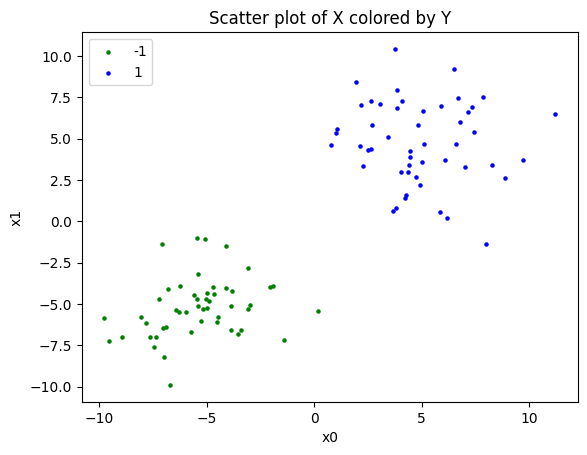

In [117]:
### 4.1 Scatter plot of data
def scat_plot(X_data, Y_data):
    # General function to plot X colored by Y
    plt.figure(1)
    plt.scatter(X_data[:, 0][:50], X_data[:, 1][:50], c='g', s=5)
    plt.scatter(X_data[:, 0][50:], X_data[:, 1][50:], c='b', s=5)
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.title("Scatter plot of X colored by Y")
    plt.legend([-1, 1], loc = "upper left")
    return

scat_plot(X_data, Y_data)



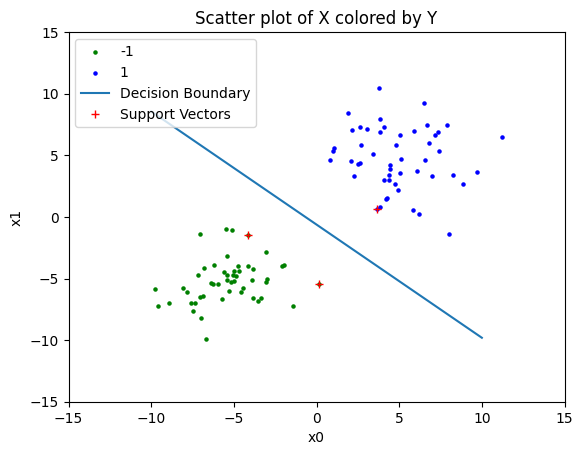

In [118]:
### 4.2 SVM C=1

def train_svm(X_data, Y_data, c):
    # General function to train linear SVM & return boundary and support vectors
    lin_svm = svm.SVC(kernel="linear", C=c)
    lin_svm.fit(X_data, np.reshape(Y_data, (len(Y_data),)))
    # Get decision boundary and support vectors
    w, b = lin_svm.coef_[0], lin_svm.intercept_[0] # lambda_* and lambda_0
    sup_vec = lin_svm.support_vectors_
    return w, b, sup_vec

w, b, sup_vec = train_svm(X_data, Y_data, 1)
x_pts = np.linspace(-10, 10)
y_pts = -(w[0] / w[1]) * x_pts - (b / w[1])         # make decision boundary points

# Plot with decision boundary and support vecotrs
scat_plot(X_data, Y_data)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.plot(x_pts, y_pts)
for v in sup_vec:
    plt.plot(v[0], v[1], 'r+')
plt.legend(["-1", "1", "Decision Boundary", "Support Vectors"], loc = "upper left")

Text(0, 0.5, 'Number of Support Vectors')

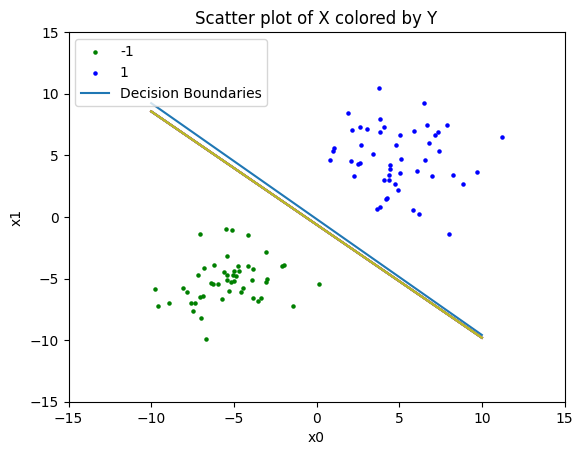

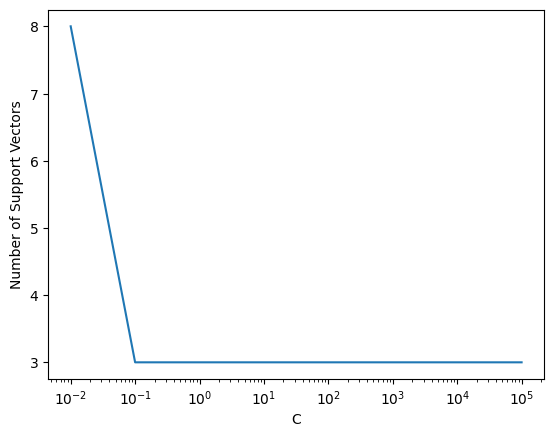

In [119]:
### 4.3 C vs num support vectors
Cs = [0.01, 0.1, 0.5, 1, 10, 100, 1000, 10000, 100000]

scat_plot(X_data, Y_data)
plt.xlim(-15, 15)
plt.ylim(-15, 15)

c_vs_supvec = []

for c in Cs:
    w, b, sup_vec = train_svm(X_data, Y_data, c)
    c_vs_supvec.append([c, len(sup_vec)])
    x_pts = np.linspace(-10, 10)
    y_pts = -(w[0] / w[1]) * x_pts - (b / w[1])
    plt.plot(x_pts, y_pts)
plt.legend(["-1", "1", "Decision Boundaries"], loc = "upper left")

plt.figure(2)
c_vs_supvec = np.reshape(c_vs_supvec, (len(c_vs_supvec), 2))
plt.plot(c_vs_supvec[:, 0], c_vs_supvec[:, 1])
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Number of Support Vectors")


Text(0, 0.5, 'Number of Support Vectors')

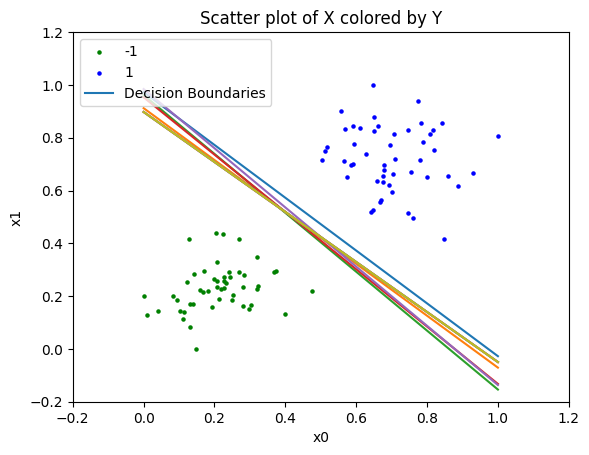

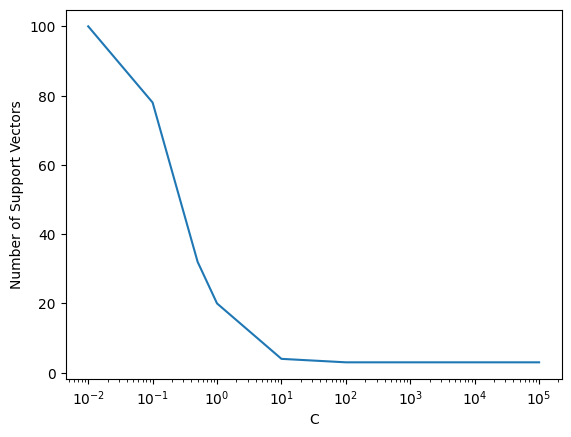

In [120]:
### 4.4 With normalized data
X_norm = preprocessing.MinMaxScaler().fit_transform(X_data)

Cs = [0.01, 0.1, 0.5, 1, 10, 100, 1000, 10000, 100000]

scat_plot(X_norm, Y_data)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

c_vs_supvec = []

for c in Cs:
    w, b, sup_vec = train_svm(X_norm, Y_data, c)
    c_vs_supvec.append([c, len(sup_vec)])
    x_pts = np.linspace(0, 1)
    y_pts = -(w[0] / w[1]) * x_pts - (b / w[1])
    plt.plot(x_pts, y_pts)
plt.legend(["-1", "1", "Decision Boundaries"], loc = "upper left")

plt.figure(2)
c_vs_supvec = np.reshape(c_vs_supvec, (len(c_vs_supvec), 2))
plt.plot(c_vs_supvec[:, 0], c_vs_supvec[:, 1])
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Number of Support Vectors")

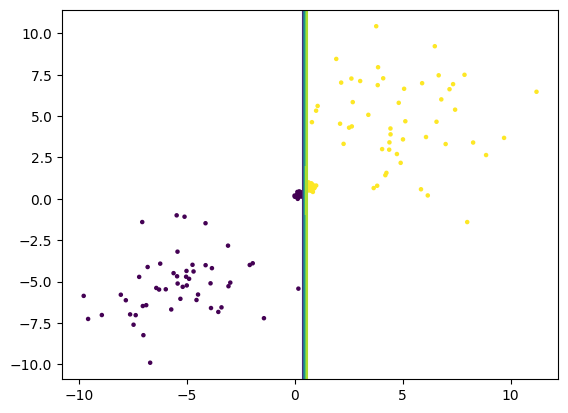

In [121]:
### 4.5 Boosted decision trees
boosted_tree = AdaBoostClassifier(random_state=0, n_estimators=10)
boosted_tree.fit(X_data, np.reshape(Y_data, (len(Y_data),)))

# W/ norm data
boosted_tree2 = AdaBoostClassifier(random_state=0, n_estimators=10)
boosted_tree2.fit(X_norm, np.reshape(Y_data, (len(Y_data),)))


plt.figure(3)
ax = plt.axes()

tree_boundary = DecisionBoundaryDisplay.from_estimator(boosted_tree, X_data, 
                                                       response_method="decision_function", 
                                                       plot_method="contour", ax=ax)
tree_boundary.ax_.scatter(X_data[:, 0], X_data[:, 1], c=Y_data, s=5)

tree_boundary2 = DecisionBoundaryDisplay.from_estimator(boosted_tree2, X_norm, 
                                                        response_method="decision_function", 
                                                        plot_method="contour", ax=ax)
tree_boundary2.ax_.scatter(X_norm[:, 0], X_norm[:, 1], c=Y_data, s=5)
